## Step 1: Load

We need to set-up several things and with a specific structure so that it's readable for the excursion estimator and
learner object.
We have pre-loaded a python script for data on:
-  **True/Black-box function** (this is not a tutorial using funcX, just a simple toy function is all we need)
-  **Grid**: domain where you will search for next evaluation points?
<br /><br />We have pre-loaded a yaml script for algorithm options on:
-  **Gaussian Process**: which kernel and likelihood do you want to use?
-  **Algorithm Options**: which acquisition function? Do you want batch selection? How many points per batch? Which batch method selection?

There are many choices and a user might not know a priori what to use. That is why I am preparing a set of complete
examples that you just have to load to get started. These pre-build examples are in `excursion/???/*.py` these
`.py` scripts contain initialization for: true/black-box function and grid (the "numerical options"). The files in
`excursion/??/??/*.yml` are yaml files that contain pre-established Gaussian Processes and Algorithm Options
(the "algorithm options"). This way of ordering the init step makes it easy to fix a numerical problem while trying
different algorithm configurations and vice versa.
<br /><br /> The purpose of using the abstract interfaces for a learner object helps reduce the amount of interaction
users have with the torch library to a minimum. The complete examples provide the ability for the user to explore the entire
excursion library without having to write their own code.


In [20]:
import yaml
import json
%load_ext autoreload
%autoreload 2
import numpy as np
np.warnings.filterwarnings('ignore')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import excursion_new.test_suite.test_functions.fast_2D as testcase_2D
import excursion_new.test_suite.test_functions.fast_1D as testcase_1D

file = open('../excursion_new/test_suite/algorithm_specs_test.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))

algorithm_opts =
{
    "example": "Simple Learner Usage",
    "ninit": 3,
    "init_type": "random",
    "jump_start": true,
    "device": "cpu",
    "model": {
        "type": "ExactGP"
    },
    "acq": {
        "acq_type": "mes"
    }
}


## Step 2: Initialize the learner objects.
There are many ways we could have started our Bayesian optimization problem. Using the provided example templates you
can avoid all of that using the Learner class. If you wanted your own special initialization you can use _Learner and
make your own.

In [22]:
from excursion_new.learner import Learner
learner_one = Learner(testcase_1D, algorithm_opts)
learner_two = Learner(testcase_2D, algorithm_opts)


# This creates the estimator object which will do the steps of Bayesian optimization.
# Can fix later so that just calling learner.suggest() if initialize wasn't called yet then it will call.
# It can be very expensive to initialize an estimator if it is a snapshot, since it will need training, so this function was spun off.
learner_one.initialize()
learner_two.initialize()

## Step 3: Run the optimization loop.
There are two ways to do this. If the problem details have properly provided a function handle then one can run the loop
with the extra functions provided by learner. If not they must use the ask-and-tell style loop.

tensor([[-0.8990]], dtype=torch.float64)


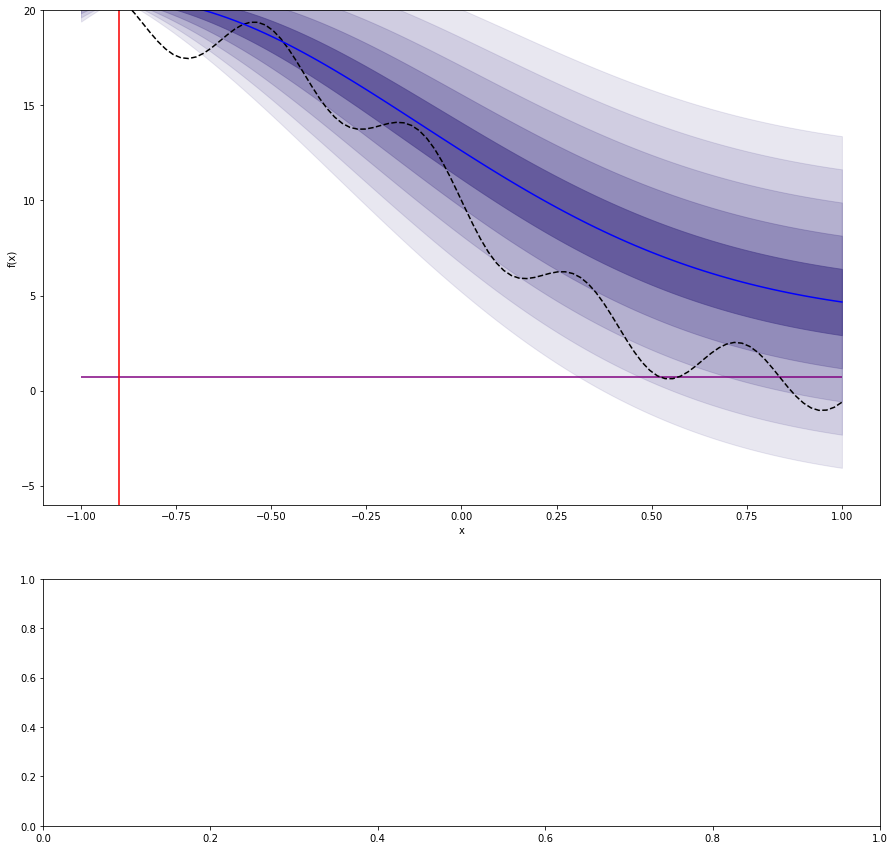

tensor([[-0.2121]], dtype=torch.float64)


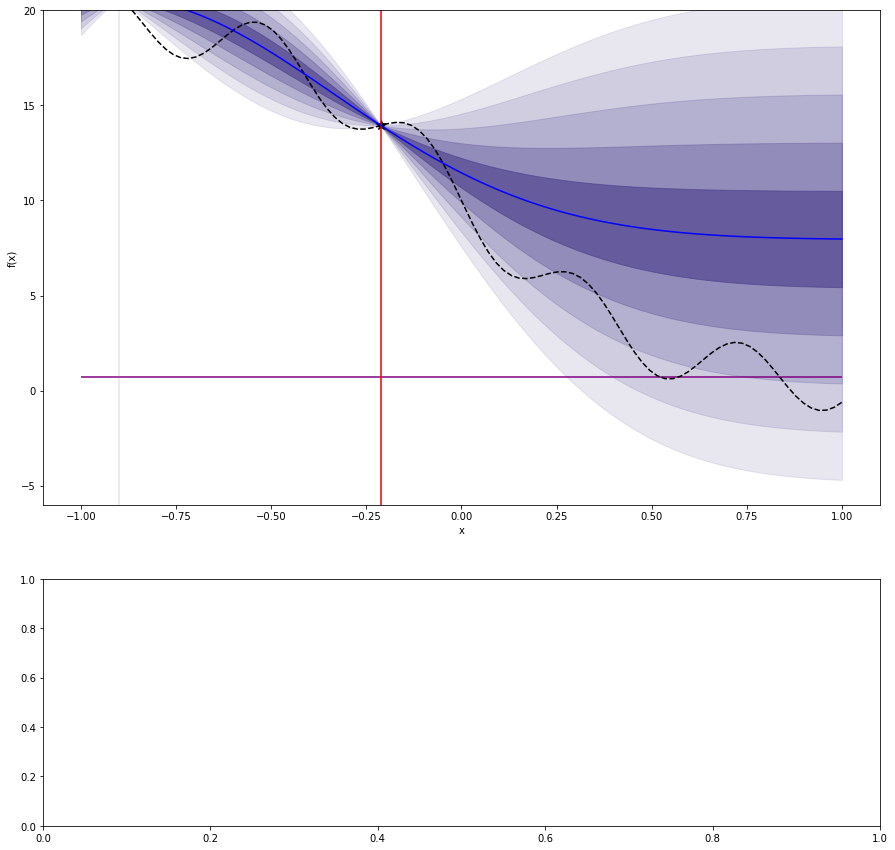

tensor([[-0.5758]], dtype=torch.float64)


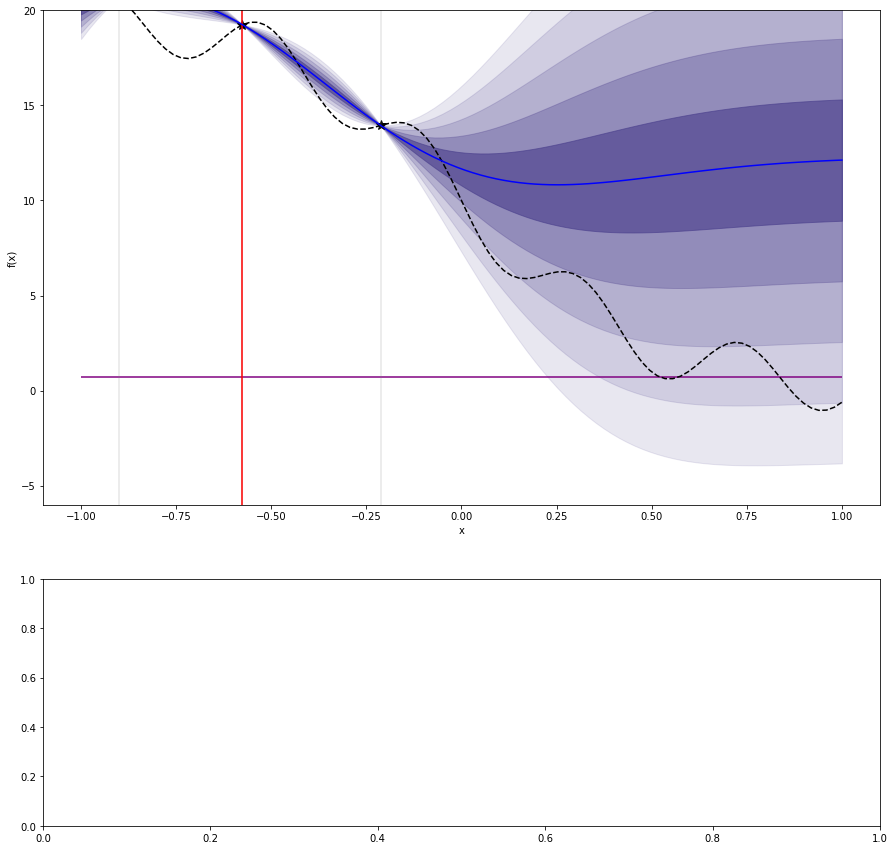

tensor([[-0.5758]], dtype=torch.float64)


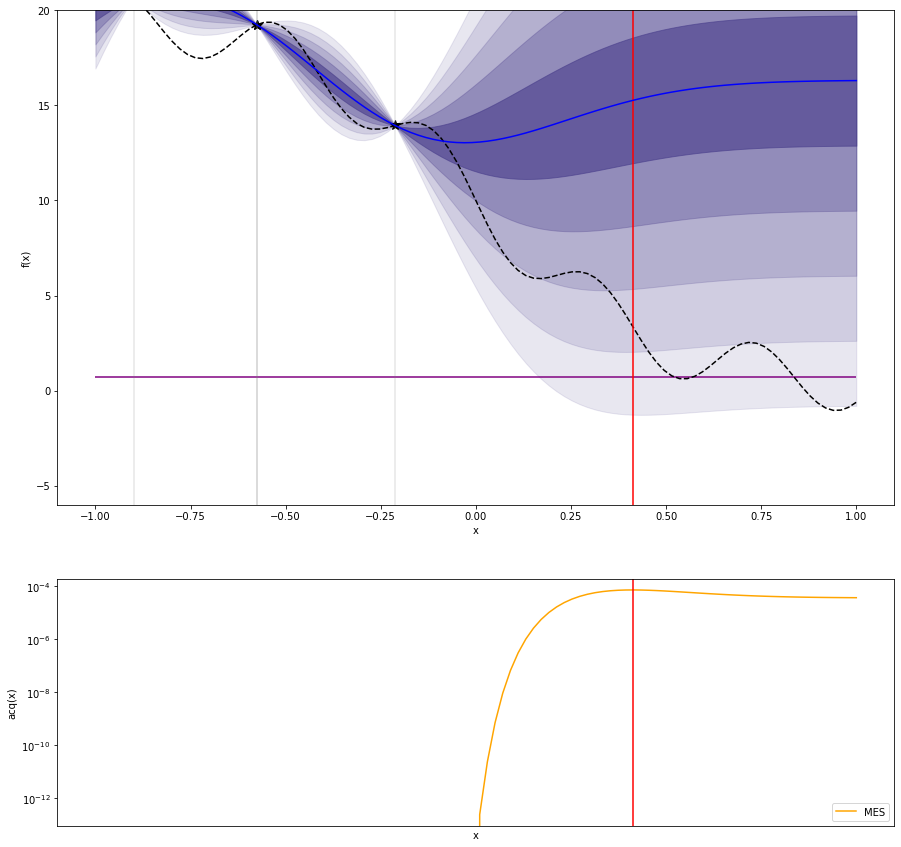

tensor([[0.4141]], dtype=torch.float64)


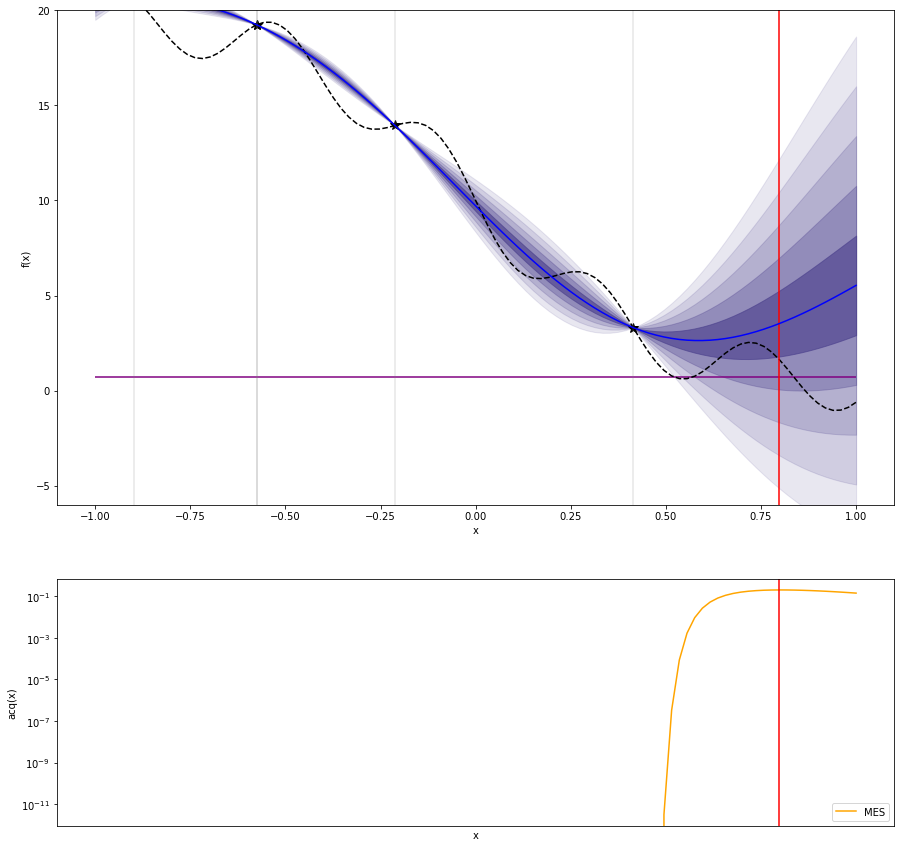

tensor([[0.7980]], dtype=torch.float64)


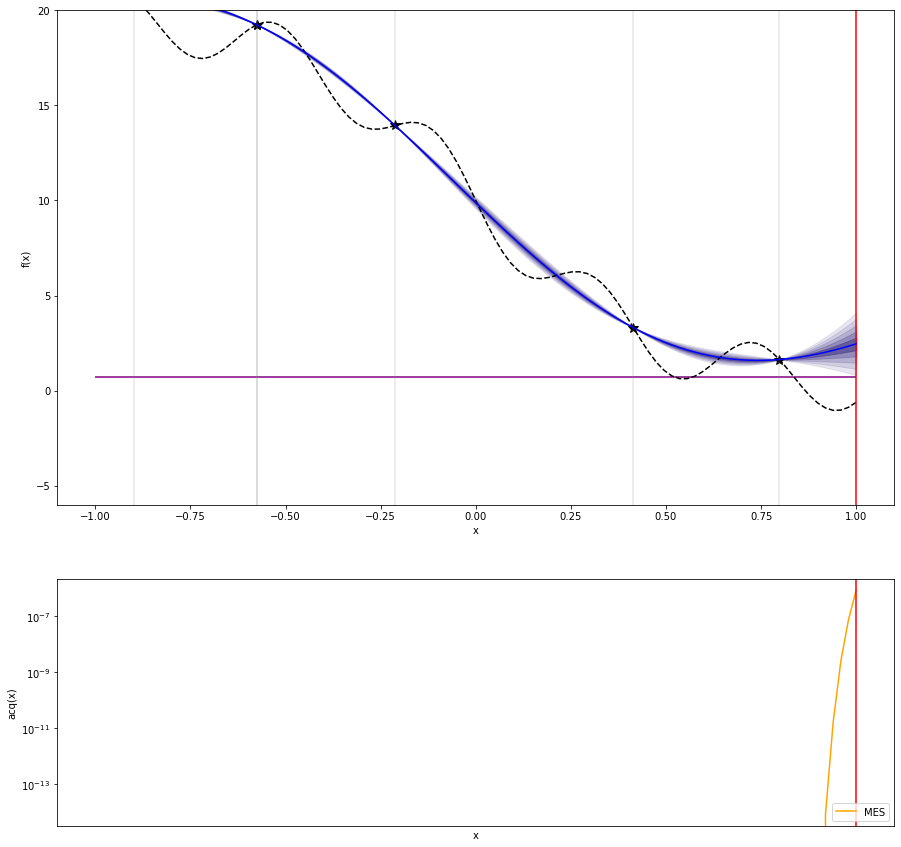

tensor([[1.]], dtype=torch.float64)


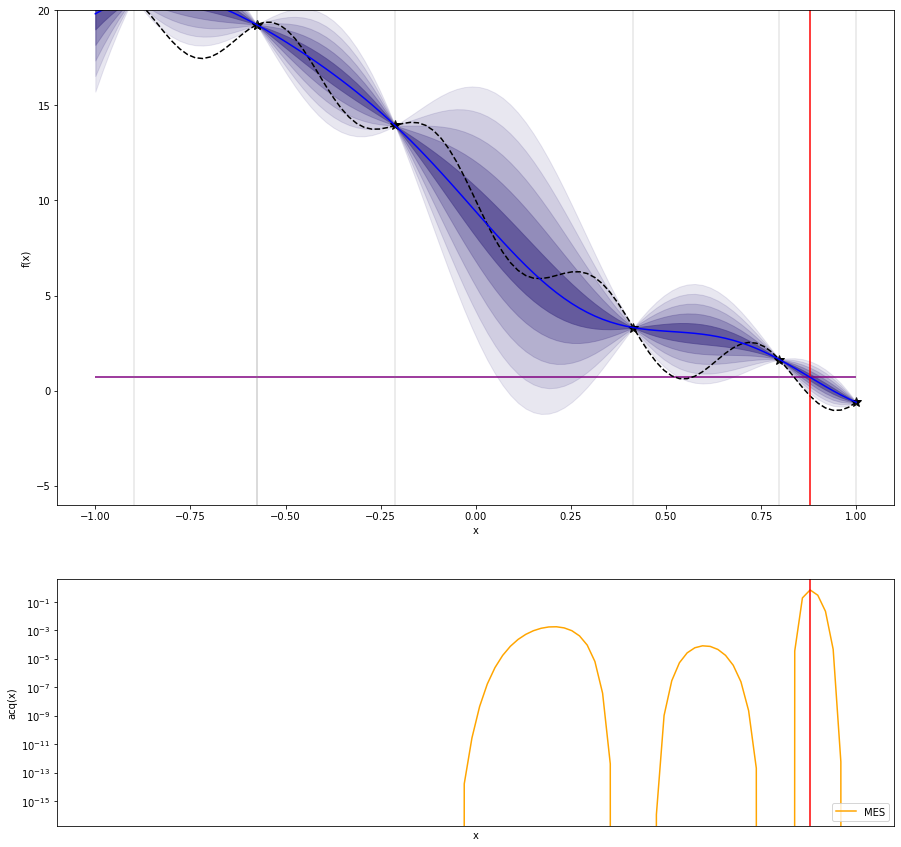

tensor([[0.8788]], dtype=torch.float64)


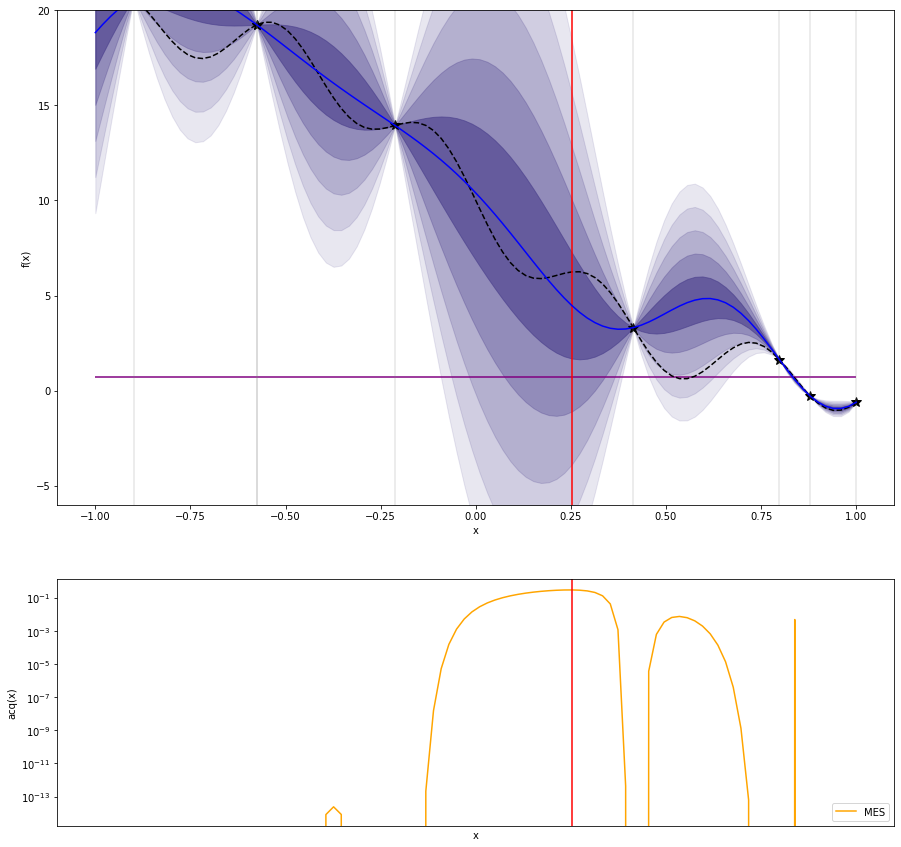

tensor([[0.2525]], dtype=torch.float64)


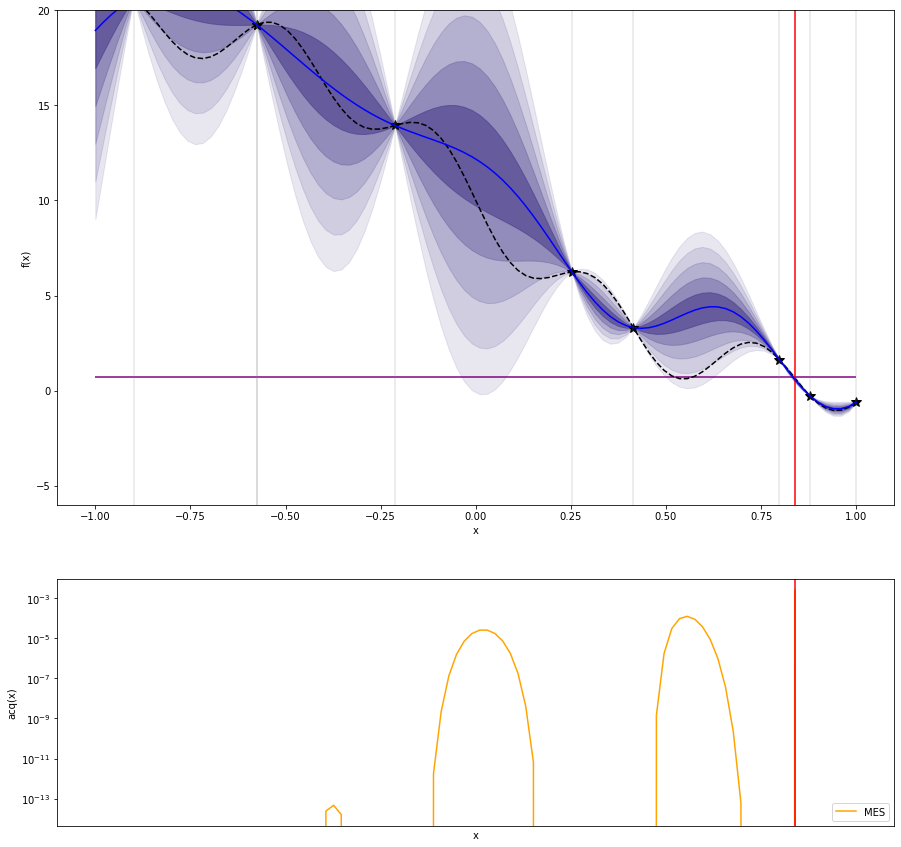

tensor([[0.8384]], dtype=torch.float64)


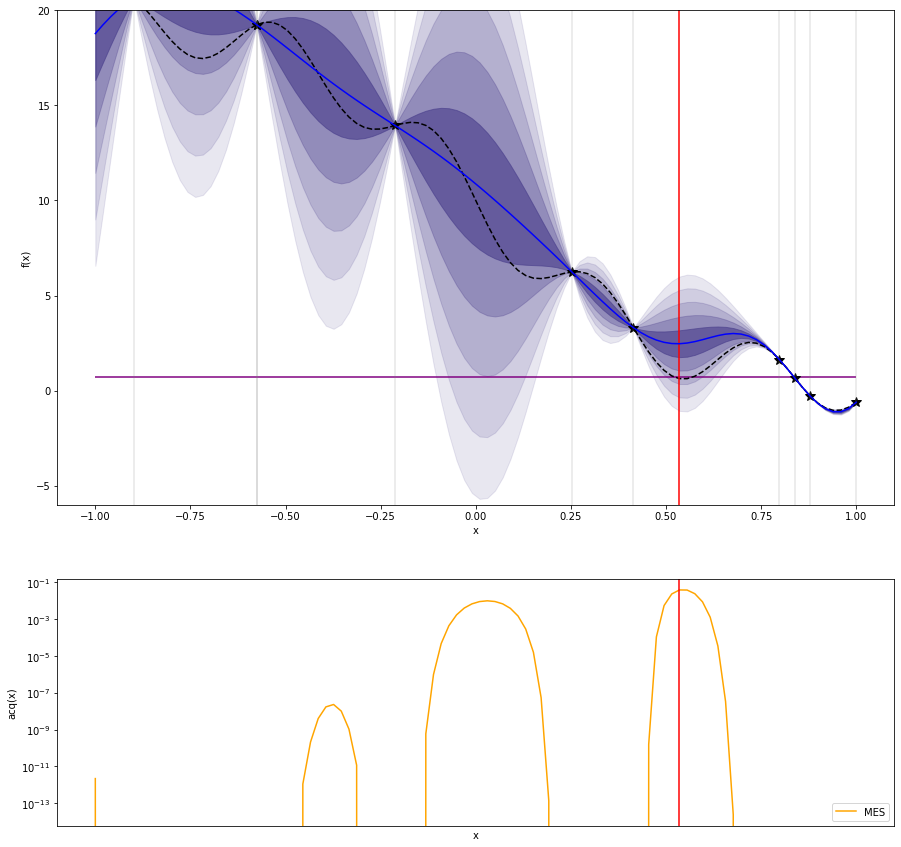

tensor([[0.5354]], dtype=torch.float64)


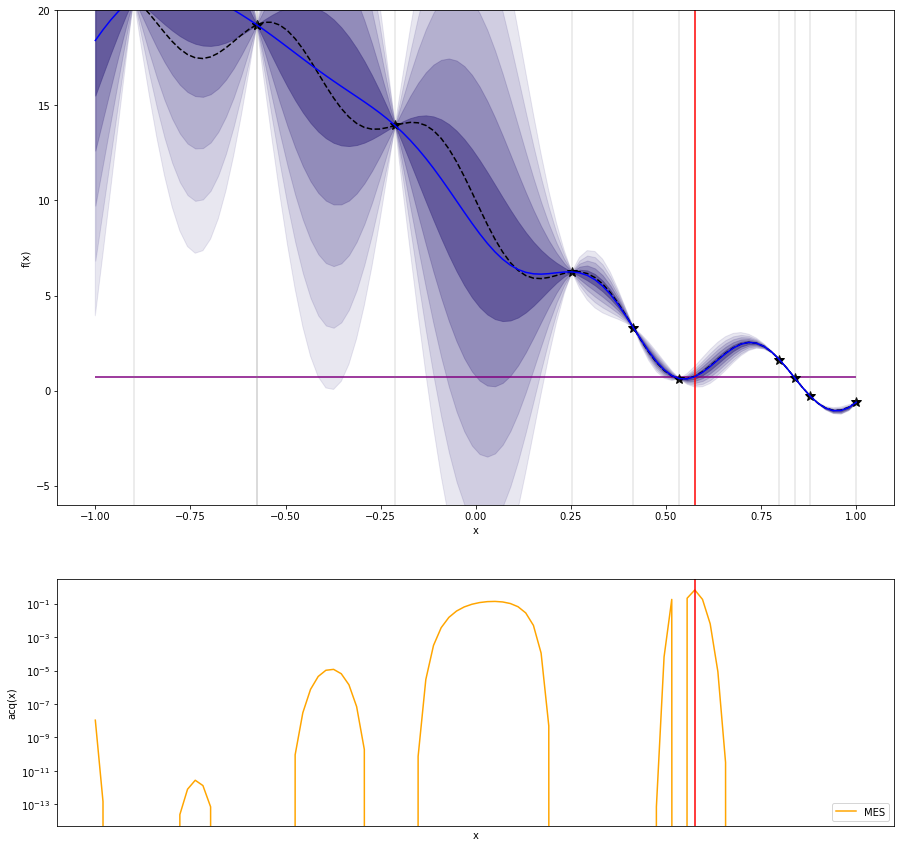

tensor([[0.5758]], dtype=torch.float64)


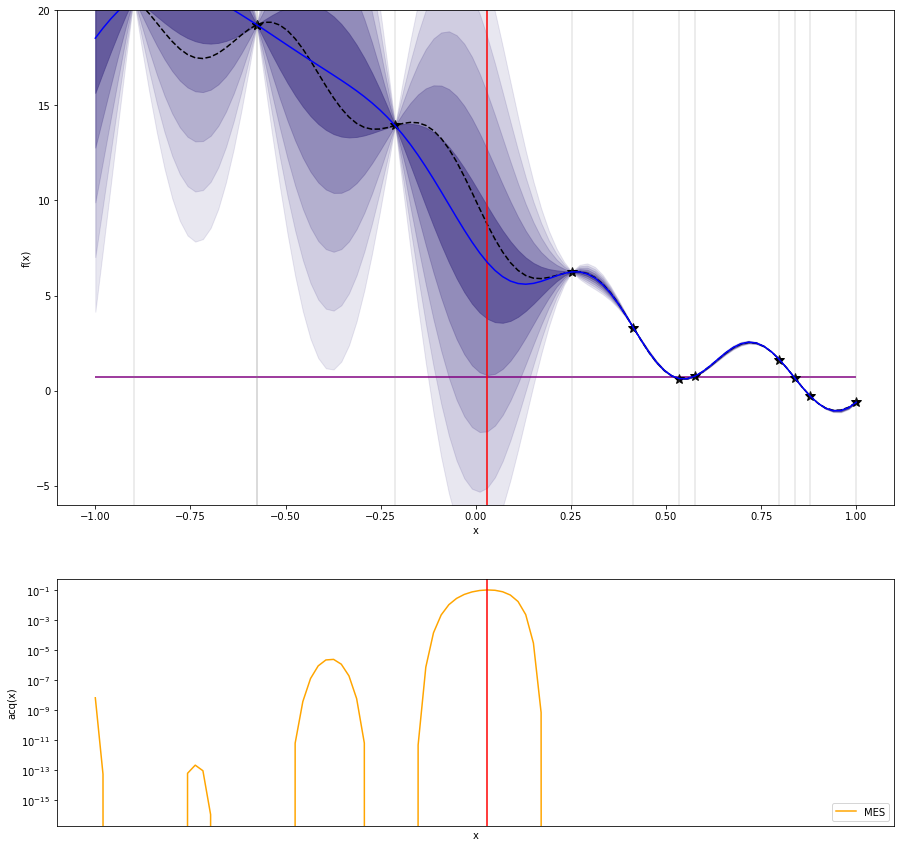

tensor([[0.0303]], dtype=torch.float64)


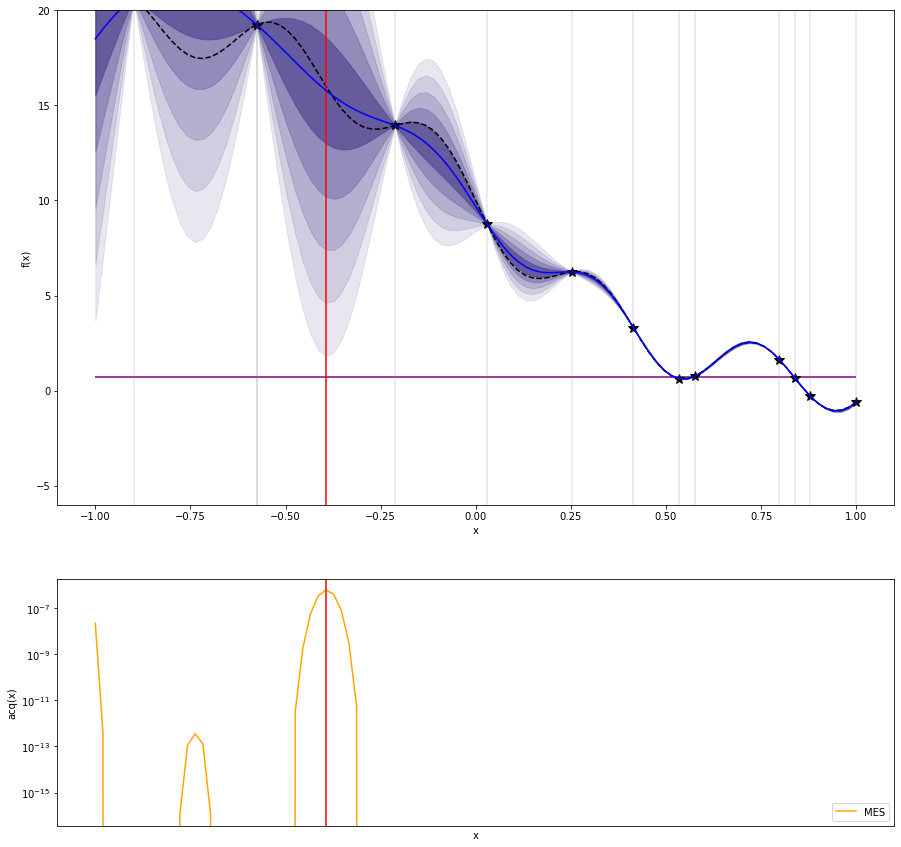

tensor([[-0.3939]], dtype=torch.float64)


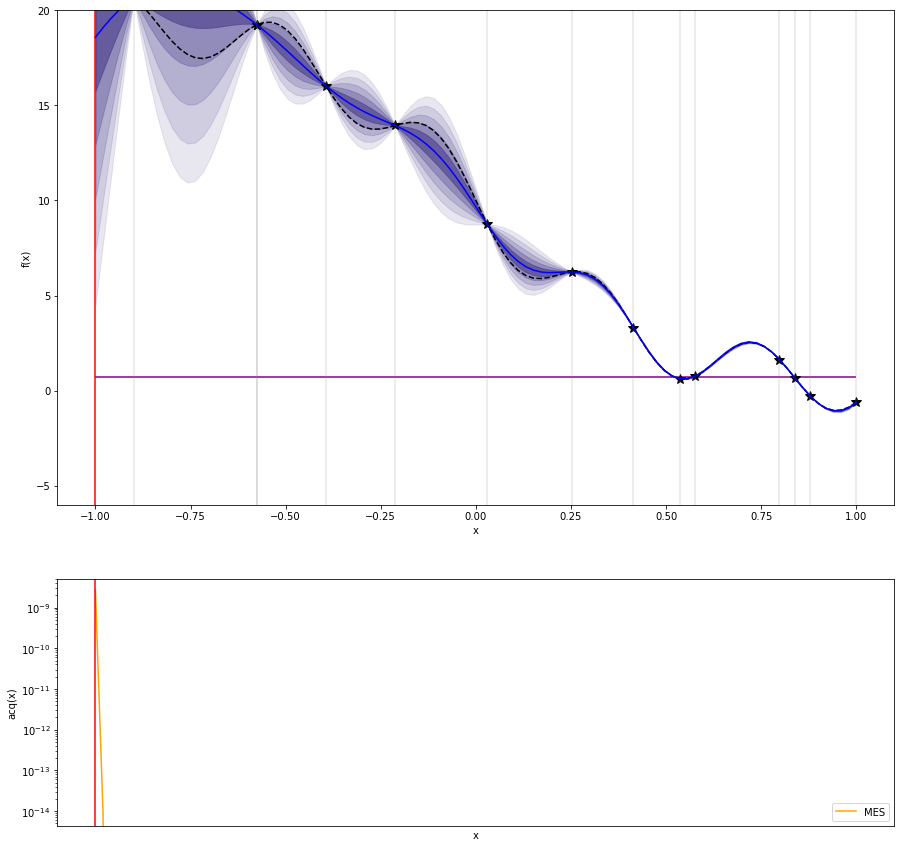

tensor([[-1.]], dtype=torch.float64)


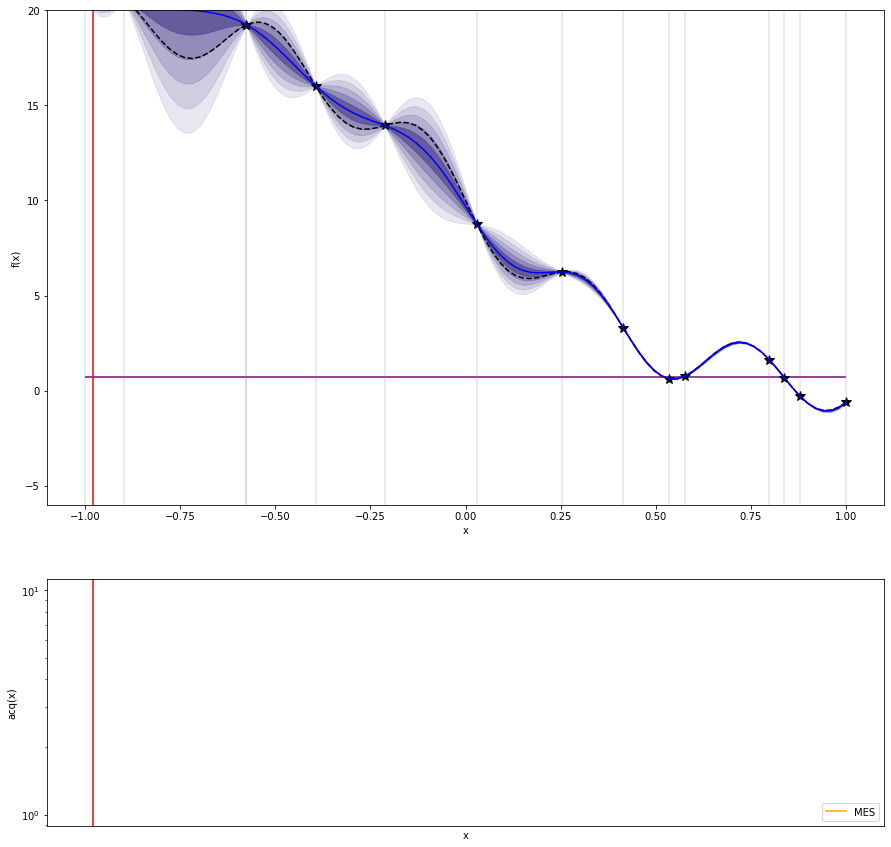

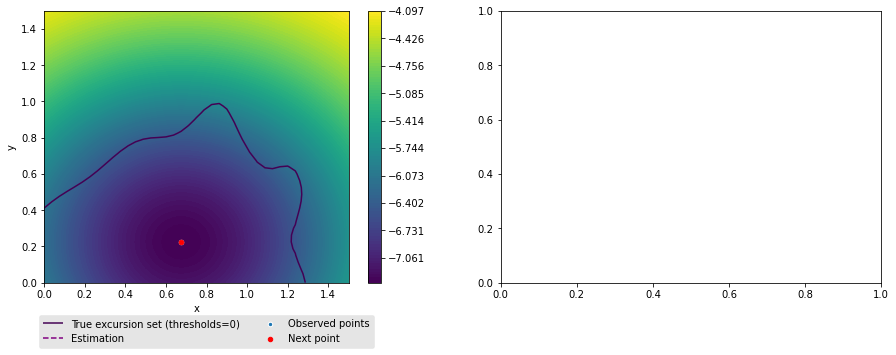

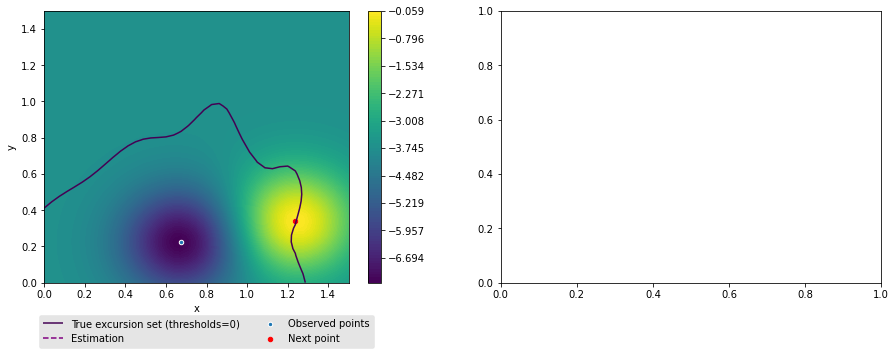

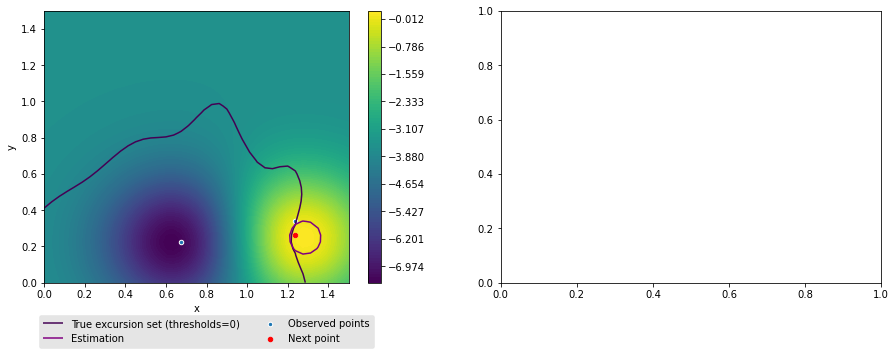

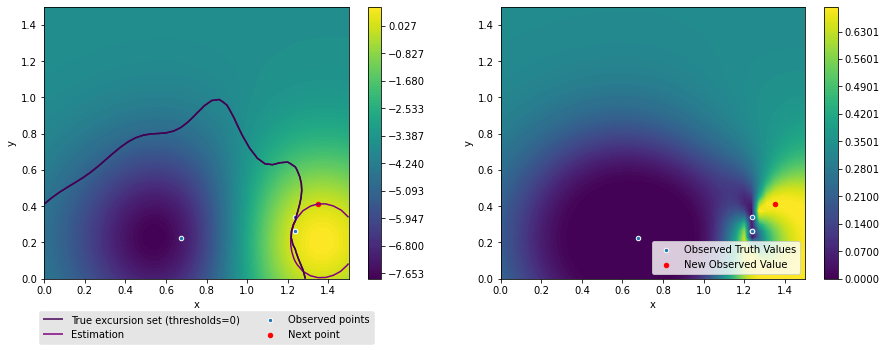

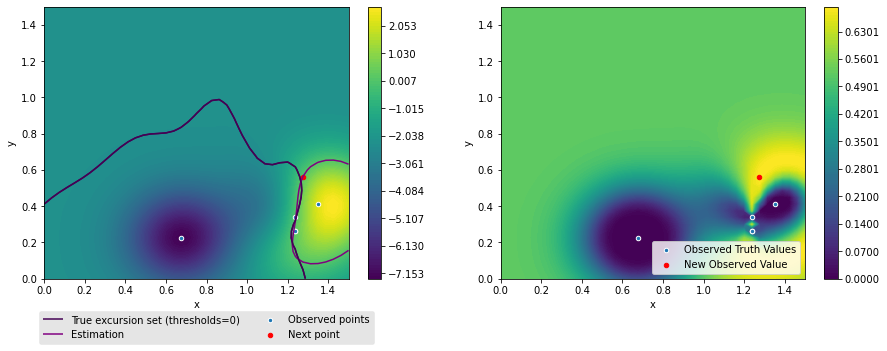

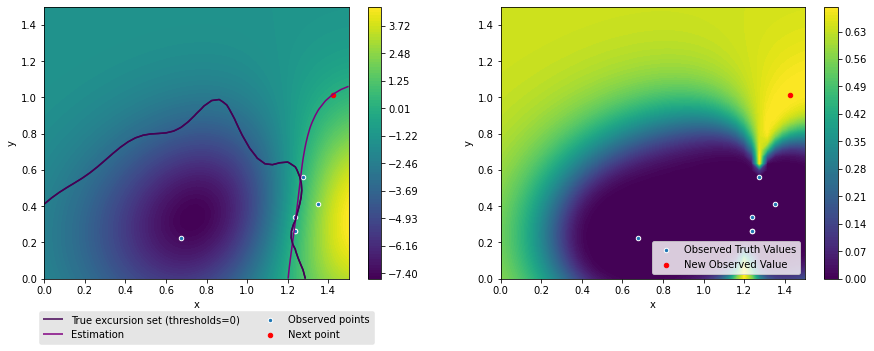

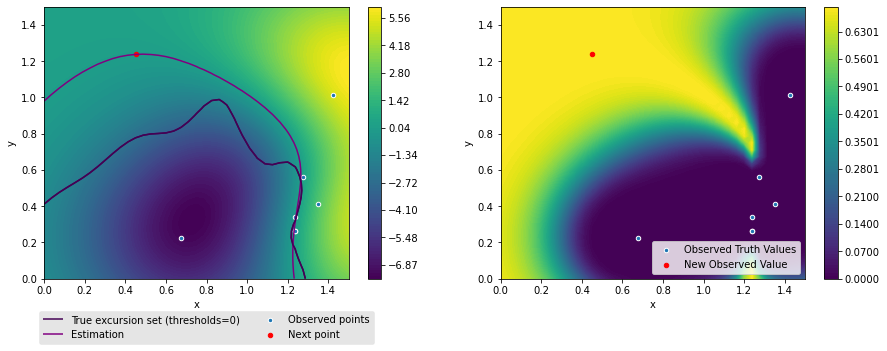

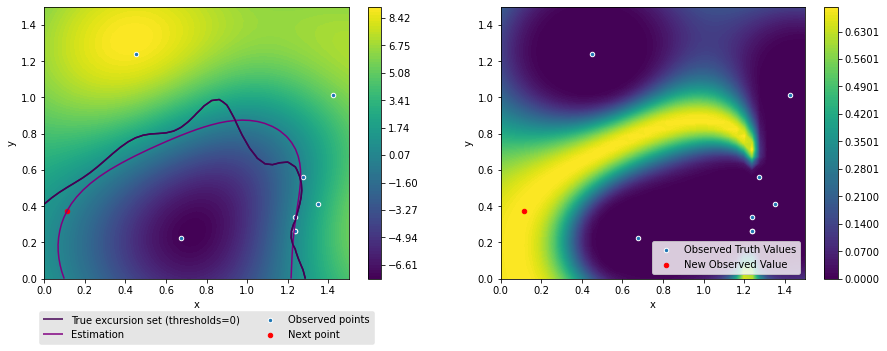

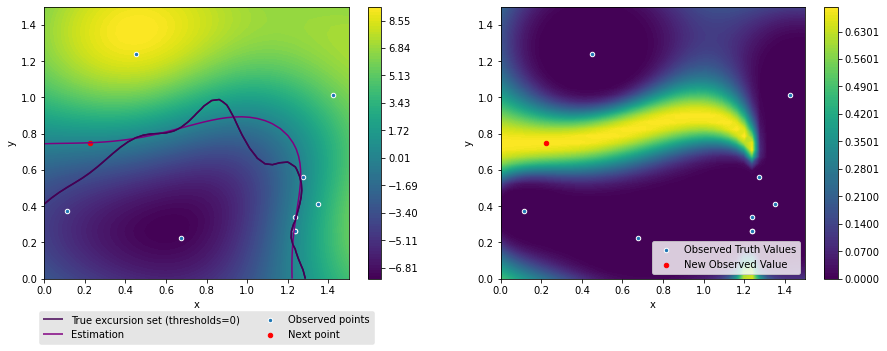

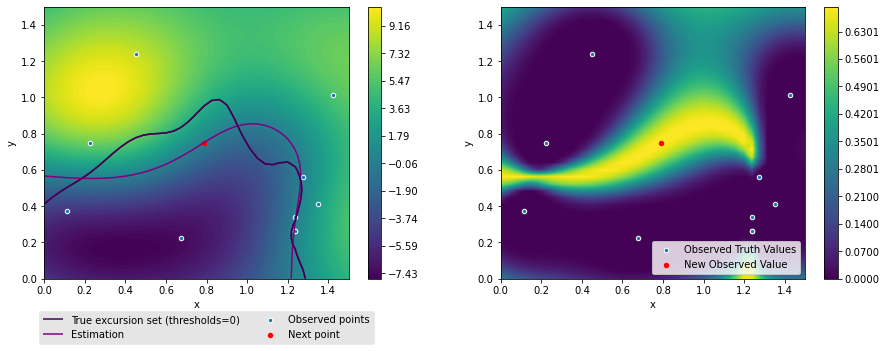

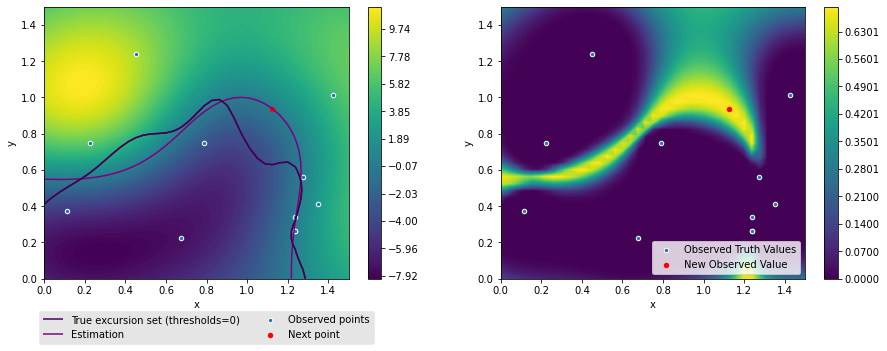

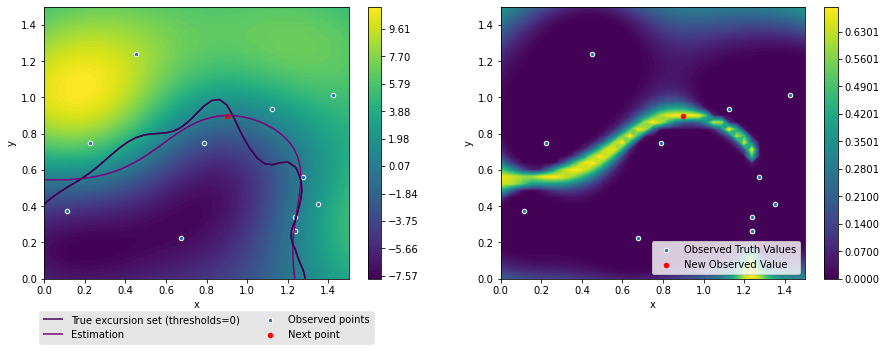

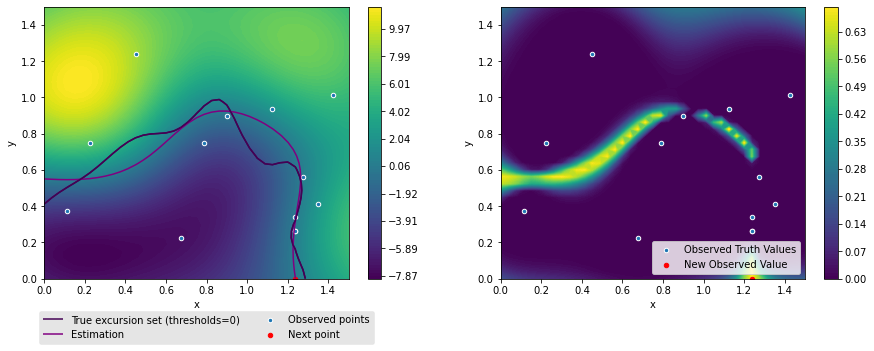

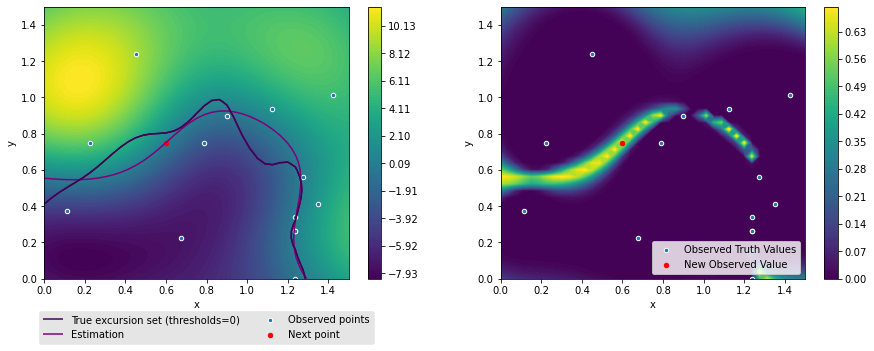

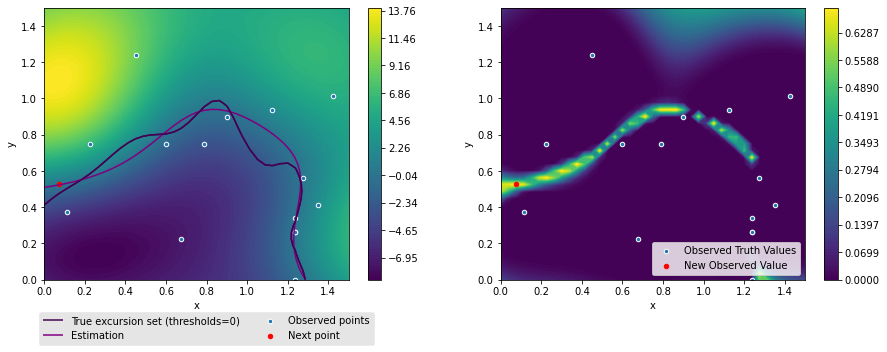

In [23]:
for iteration in range(15):
    x_one = learner_one.suggest()
    print(x_one)
    result_one = learner_one.evaluate_and_tell(x_one)
    result_one.plot()

learner_two.run(15,plot_result=True)

# for iteration in range(15):
#     x_two = learner_two.suggest()
#     print(x_two)
#     result_two = learner_two.evaluate_and_tell(x_two)
#     result_two.plot()

In [24]:
# #
# # If I do not have the function handle properly provided in the problem details I can use basic ask-and-tell.
# #
import excursion_new.test_suite.test_functions.fast_3D as testcase_3D
learner_three = Learner(testcase_3D, algorithm_opts)
learner_three.initialize()

for iteration in range(6):
    x_three = learner_three.suggest()
    new_y = learner_three.details.functions[0](x_three)
    print(x_three, new_y)
    result_three = learner_three.tell(x_three, new_y)
    print(result_three)
    # result_three.plot()

tensor([[1.0125, 0.3375, 1.1625]], dtype=torch.float64) tensor([7.6139], dtype=torch.float64)
tensor([[1.0875, 1.1250, 0.2625]], dtype=torch.float64) tensor([5.3933], dtype=torch.float64)
tensor([[0.6375, 0.2250, 1.3500]], dtype=torch.float64) tensor([6.2261], dtype=torch.float64)
tensor([[0.6375, 0.2250, 1.3500]], dtype=torch.float64) tensor([6.2261], dtype=torch.float64)
tensor([[0.6000, 1.0875, 0.2250]], dtype=torch.float64) tensor([7.2635], dtype=torch.float64)
tensor([[1.0125, 1.0125, 0.4875]], dtype=torch.float64) tensor([6.2319], dtype=torch.float64)
